In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
encoder = LabelEncoder()
binary_encoded_y = pd.Series(encoder.fit_transform(y))

Highest accuracy is  0.8603351955307262


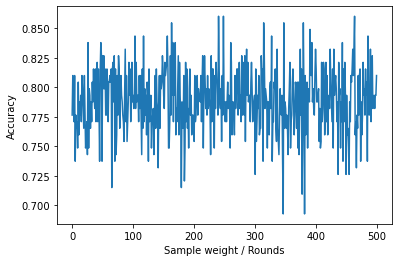

In [3]:
# Reading data
d = pd.read_csv("Titanic_train.csv")[['Age', 'Fare', 'Pclass', 'Survived', 'Sex', 'SibSp', 'Parch']].dropna()
encoder = {"Sex": {"female": 1, "male": 0}}
d = d.replace(encoder)

def absolute_maximum_scale(series):
    return series / series.abs().max()

def absolute_maximum_scale(series):
    return series / series.abs().max()

for col in d.columns:
    d[col] = absolute_maximum_scale(d[col])


# Constructing the X and Y matrices
X = d[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp', 'Parch']]
y = d['Survived'].values.tolist()

xAxis = np.arange(500)
accuracies = []
for i in range(500):
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=i)
    classifier = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=200
    )
    classifier.fit(train_X, train_y, sample_weight=i+1)
    predictions = classifier.predict(test_X)
    accuracies.append(accuracy_score(predictions,test_y))

plt.xlabel('Sample weight / Rounds')
plt.ylabel('Accuracy')
plt.plot(xAxis,accuracies)
print("Highest accuracy is ",max(accuracies))

## Observations

There seems to be little to no correlation between the sample weight and the accuracy. The accuracy ranges from 70 - 85% reaching a peak of about 85-86%.